## Regression

### Linear Regression

The purpose of regression is to fit a line.  This line is used to interpret some sort of relationship between one or more "x" variables and a "y" variable.  For example:

$$
y = \alpha + \beta x
$$

describes a straight line with intercept $\alpha$ and slope $\beta$.  The variable `x` is referred to as the *regressor* in this model.  Models can have multiple regressors.

We can generate some data that draws such a line.  In this example, take $\alpha=4$ and $\beta=0.5$.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)
line = pd.DataFrame(columns=['x', 'y'])
line['x'] = np.random.randint(low=-10, high=10, size=100)
line['y'] = 4 + 0.5*line['x']
line.head()

,x,y
0,2,5.0
1,5,6.5
2,-10,-1.0
3,-7,0.5
4,-7,0.5


Using the `seaborn` plot function `lineplot`(), we can visualize this line.

<AxesSubplot:xlabel='x', ylabel='y'>

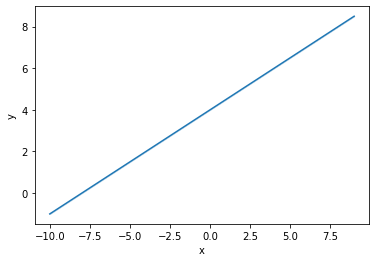

In [2]:
import seaborn as sns

sns.lineplot(x='x', y='y', data=line)

No surprises here, we get a straight line.  The slope is one-half, and the intercept is 4.

In the real world, relationships between $x$'s and $y$'s are usually complicated.  That is, there is no line that perfectly describes the connection between $x$ and $y$.  Our goal is to find the best possible approximation of a relationship.  For instance, change the above equation to

$$
y = \alpha + \beta x + u
$$

where $u$ is some random, un-observed phenomenon that makes any pair of values $(x,y)$ partially unpredictable.  Consider the following simulated dataset, where $y$ and $x$ have a known relationship (we know $\alpha=4$ and $\beta=0.5$) with some error thrown in to the mix.

<AxesSubplot:xlabel='x', ylabel='y'>

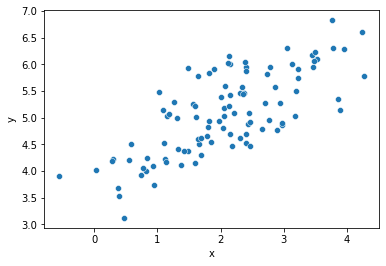

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(0)
df = pd.DataFrame(columns=['x','y'])
df['x'] = np.random.normal(2, 1, 100)
df['y'] = 4 + 0.5 * df['x'] + np.random.normal(0, 0.5, 100)
sns.scatterplot(x='x', y='y', data=df)

In this example, the random error component $u$ makes it so that $y$ is no longer perfectly described by $x$ and the parameters $\alpha,\beta$.

When performing analytics, we'll be given data.  Suppose that data looks like what's described in `df`.  So, for example, we can see that the first few and last few rows look like:

In [4]:
print(df)
print(4 + 0.5*3.764052)

           x         y
0   3.764052  6.823602
1   2.400157  4.526199
2   2.978738  4.854126
3   4.240893  6.605145
4   3.867558  5.347217
..       ...       ...
95  2.706573  5.267513
96  2.010500  5.391145
97  3.785870  6.304687
98  2.126912  6.145074
99  2.401989  5.869259

[100 rows x 2 columns]
5.882026


When all we have is the data, the values of $\alpha$ and $\beta$ are unknown to us.  In this case, our mission is to use linear regression so that we have the best possible linear fit between $y$ and $x$.

Such a "line of best fit" is shown below.

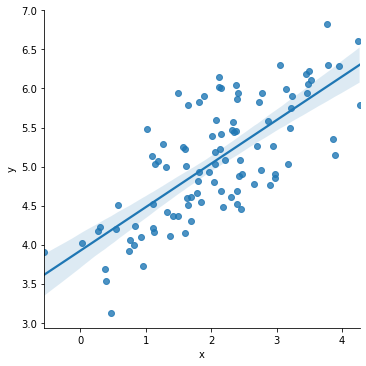

In [5]:
sns.lmplot(x='x', y='y', data=df)

This line is solved, by `seaborn`, using regression.  But `seaborn` only computes the regression fit for the purposes of making a plot.  It doesn't tell you what the *beta coefficient*, $\beta$, is estimated to be.  Nor does it report the estimated intercept $\alpha$.

When parameters like $\alpha$ and $\beta$ are estimated, we usually put "hats" on them to denote that it's an estimated value.  Thus, the estimated relationship is given by

$$
\hat{y} = \hat{\alpha} + \hat{\beta} x
$$

which tells us that, using the estimated values for $\alpha$ and $\beta$, one would estimate the value for $y$ to be $\hat{y}$, given the value $x$.

There are many commands that can be used to generate this linear regression fit, and those will be discussed in a little bit.

### Outliers

Let's consider the effect of an outlier on the sample, and in so doing give relevancy to earlier parts of the chapter.

Let's hard-code a data error in the `pandas` `DataFrame` variable `df` by using the `.loc` function to change the `y` value for one of the rows.

In [6]:
df.loc[0, 'y'] = 100

What we've done in the above line of code is increase the `y` value of the first observation by a factor of 10.  This is a reasonable error to consider, using real (non-simulated) data, someone could very well accidentally hit the zero key when entering in rows of `x` and `y` data by hand.

First, let's look at the boxplot.

/mnt/software/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='y'>

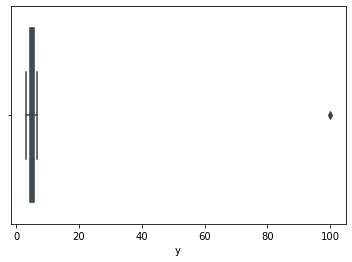

In [7]:
sns.boxplot(df['y'])

The outlier we've entered stands out clearly.  We can verify that the outlier we're seeing is in fact the first row we modified by typing:

In [8]:
df.iloc[0]

x      3.764052
y    100.000000
Name: 0, dtype: float64

and noticing that the `y` value there is indeed the point we're seeing as an outlier in the data.

What happens if we don't correct for this issue when we perform an analytics task like linear regression?  Note that the scatter plot likewise shows a big problem due to the outlier.

<AxesSubplot:xlabel='x', ylabel='y'>

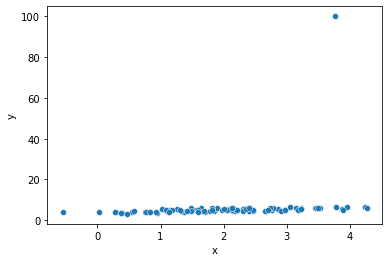

In [9]:
sns.scatterplot(x='x', y='y', data=df)

How can we expect Python to find a line of best fit through that scatter plot, when there is such an egregious outlier in the plot?

Look what happens in the regression:

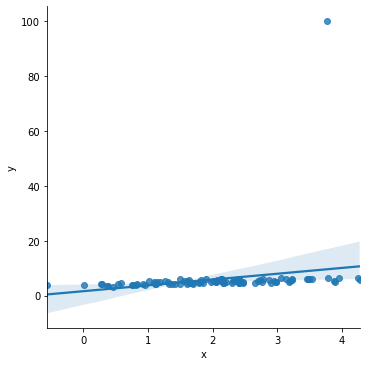

In [10]:
sns.lmplot(x='x', y='y', data=df)

While it may be hard to see the change, note that the line of best fit now reaches above all of the y values on the right hand side of the scatter plot, and dips below them on the left hand side.  In the earlier regression, this did not happen.  What's occurred here is the line of best fit now has a much steeper slope than it did before.  This is because the outlier point, which is towards the right side of the `x` distribution and is significantly above the rest of the `y` data, skews the line of best fit to be much more positively sloping.

We'll discuss solutions to remove outliers on an ad hoc basis as we work through different case studies.  Here, we simply remove that troubly observation from the distribution.

In [11]:
df = df[df['y'] < 100]

There are many commands that can be used to generate this linear regression fit, one such way is via the `statsmodels` module.

In [12]:
import statsmodels.api as sm
model = sm.OLS(df['y'], df['x']).fit() # sm.OLS(...).fit() returns as statsmodels variable type
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              686.7
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    4.59e-46
Time:                        11:03:07   Log-Likelihood:                         -198.94
No. Observations:                  99   AIC:                                      399.9
Df Residuals:                      98   BIC:                                      402.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

There is a lot of output here.  Note that about halfway down the table, the printout reports that the variable `x` has a coefficient value (denote in column "coef") of $2.1$.  This would be the $\beta$ coefficient, and thus $\hat{\beta}=2.1$.  But what about $\hat{\alpha}$?  There is no estimated intercept, because we did not tell `statsmodels` to include one.

### Intercepts and Multiple Regressors

To include an intercept term, we must tell `statsmodels` that the set of regressors includes a variable whose value is one, always.  Note that the equation $y = \alpha + \beta x + u$ that we want to estimate is the same thing as $y = \alpha 1 + \beta x + u$.  Explicitly creating a variable that is always equal to one thus allows for an intercept to be included.

In [13]:
df['cons'] = 1

model = sm.OLS(df['y'], df[['cons','x']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     109.7
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.29e-17
Time:                        11:03:07   Log-Likelihood:                -73.831
No. Observations:                  99   AIC:                             151.7
Df Residuals:                      97   BIC:                             156.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons           3.9434      0.118     33.431      0.0

In the above output, the intercept (`cons`) is estimated to be 3.9434 and the $\beta$ coefficient is estimated to be $0.5433$.  This is close to the true relationship that we constructed of $y = 4 + 0.5 x + u$.

What function we use to estimate a relationship between $y$ and the regressor(s) depends on the data that we have.  As practice using multiple x-variables, let's simulate a dataset that is generated by the following equation

$$
y = 4 + 0.5 x + 3 x^2 + u
$$

The relationship between $y$ and $x$ in the above equation is said to be *nonlinear*.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

np.random.seed(0)
df2 = pd.DataFrame(columns=['x','y','x2'])
df2['x'] = np.random.normal(0, 1, 100)
df2['x2'] = df2['x']**2
df2['y'] = 4 + 0.5*df2['x'] + 3*df2['x2'] + np.random.normal(0, 0.5, 100)
print(df2)

           x          y        x2
0   1.764052  15.159244  3.111881
1   0.400157   4.006576  0.160126
2   0.978738   6.727911  0.957928
3   2.240893  20.669952  5.021602
4   1.867558  14.810536  3.487773
..       ...        ...       ...
95  0.706573   5.765250  0.499246
96  0.010500   4.391476  0.000110
97  1.785870  14.872688  3.189333
98  0.126912   5.193394  0.016107
99  0.401989   5.354045  0.161595

[100 rows x 3 columns]


Note that to square column `'x'` to produce `'x2'`, all we need to do is type `df2['x'] ** 2` since `**` is the command for exponentiate.

Next, plot a relationship between just `y` and `x`, assuming a linear fit.

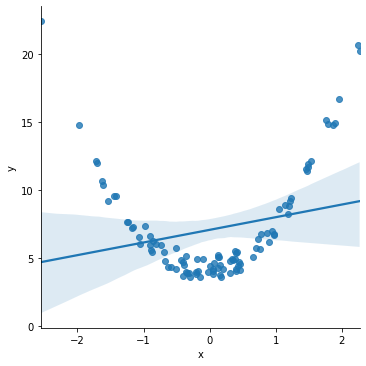

In [15]:
sns.lmplot(x='x', y='y', data=df2)

The estimated straight line gets things horribly wrong!  The line is pretty far away from a lot of the actual data points.

The scatter plot of the data above makes clear that the data demonstrates a non-linear relationship.

What we ought do to is fit a line given by

$$
\hat{y} = c + \hat{\beta}_1 x + \hat{\beta}_2 x^2
$$

where there are two beta coefficients.  One for $x$, and one for $x^2$.

In [16]:
df2['cons'] = 1

model2 = sm.OLS(df2['y'], df2[['cons', 'x', 'x2']]).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2885.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           3.91e-87
Time:                        11:03:07   Log-Likelihood:                -75.005
No. Observations:                 100   AIC:                             156.0
Df Residuals:                      97   BIC:                             163.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons           4.0714      0.066     61.584      0.0

The variable `model2` stores a lot of data.  Beyond holding summary output for the performance of the regression (which we've accessed via the `model2.summary()` command), we can reference the estimated parameters directly via `.params`.  For example:

In [17]:
print(model2.params['cons'])
print(model2.params['x'])
print(model2.params['x2'])

4.071350754098632
0.5615154693913407
2.9666242239334637


As an aside, the fact that we're using square brackets to reference items inside of `squared.params` is a clue that the `.params` component of the variable `squared` was built using a dictionary-like structure.

One way to tell that the estimates of `squared` are better than the estimates of `straight` is to look at the `R-squared` value in the summary output.  This measure takes a value between 0 and 1, with a score of 1 indicating perfect fit.  For comparison purposes, consider the linear fit model below:

In [18]:
model1 = sm.OLS(df2['y'], df2[['cons','x']]).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     5.767
Date:                Tue, 20 Oct 2020   Prob (F-statistic):             0.0182
Time:                        11:03:07   Log-Likelihood:                -277.26
No. Observations:                 100   AIC:                             558.5
Df Residuals:                      98   BIC:                             563.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons           7.0734      0.392     18.054      0.0

The linear-fit model produced an R-squared of 0.056 while the quadratic-fit model yielded a R-squared of 0.983.

Another informative way to jude a modeled relationship is by plotting the **residuals**.  The residuals are the "un-expected" part of the equation.  For example, in the linear-fit model, the residual is defined as

$$
\hat{u} := y - \hat{y} = y - \hat{c} - \hat{\beta} x
$$

and in the quadratic-fit model the residual, $\hat{u}$, is given by

$$
\hat{u} := y - \hat{y} = y- \hat{c} - \hat{\beta}_1 x - \hat{\beta}_2 x^2
$$

Using the information in `.params`, we can calculate residuals.

In [19]:
df2['resid_linear'] = df2['y'] - (model1.params['cons'] + model1.params['x']*df2['x'])
df2['resid'] = df2['y'] - (model2.params['cons'] + model2.params['x']*df2['x'] + model2.params['x2']*df2['x2'])
print(df2.head())

          x          y        x2  cons  resid_linear     resid
0  1.764052  15.159244  3.111881     1      6.442047  0.865570
1  0.400157   4.006576  0.160126     1     -3.439694 -0.764502
2  0.978738   6.727911  0.957928     1     -1.257502 -0.734829
3  2.240893  20.669952  5.021602     1     11.508419  0.443098
4  1.867558  14.810536  3.487773     1      5.996890 -0.656389


Next, plot the two sets of residuals.

<AxesSubplot:xlabel='x', ylabel='resid_linear'>

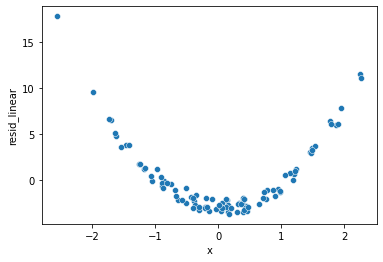

In [20]:
sns.scatterplot(x='x', y='resid_linear', data=df2)

In the straight-line model, we can see that the errors have a noticeable pattern to them.  This is an indication that a more complicated function of $x$ would be a better description for the relationship between $x$ and $y$.

<AxesSubplot:xlabel='x', ylabel='resid'>

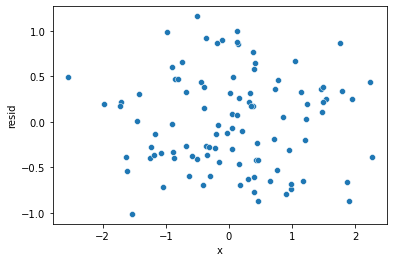

In [21]:
sns.scatterplot(x='x', y='resid', data=df2)

In comparison, the residuals from the squared model look more random.  Additionally, they're substantially smaller on average, with almost all residuals having an absolute value less than one.  This indicates a much better fit than the straight-line model in which the residual values were often much larger.

### Looking Beyond OLS

OLS works well when the $y$ variable in our model is a linear combination of $x$ variables.  Note that the relationship between $y$ and a given regressor may be nonlinear, as in the case of $y$ being a function of $x$ and $x^2$.  However, while we may say that $y$ is a nonlinear function of $x$ in this case, the variable $y$ is still a linear function of $x$ and $x^2$.  To clarify:

$$
y = \alpha + \beta x + u
$$

is linear in $x$.  Likewise:

$$
y = \alpha + \beta_1 x + \beta_2 x^2 + u
$$

is linear in $x$ and $x^2$.  In contrast, the function

$$
y = \frac{e^{\alpha + \beta x + u}}{1 + e^{\alpha + \beta x + u}}
$$ is *nonlinear*.  This last equation may look terrifyingly unnatural, but it's actually very useful.  Let's get a 

sense of what the equation looks like by plotting the function

$$
y = \frac{e^{x}}{1 + e^{x}}.
$$


    x         y
0   2  0.880797
1   5  0.993307
2 -10  0.000045
3  -7  0.000911
4  -7  0.000911


<AxesSubplot:xlabel='x', ylabel='y'>

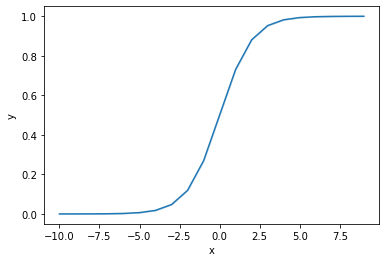

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

np.random.seed(0)
curve = pd.DataFrame(columns=['x','y'])
curve['x'] = np.random.randint(low=-10, high=10, size=100)
curve['y'] = np.exp(curve['x']) / (1+np.exp(curve['x']))
print(curve.head())
sns.lineplot(x='x',y='y',data=curve)

The function $y = e^{x}/(1+e^{x})$ creates an S-curve with a lower bound of $0$ and an upper bound of $1$.

These bounds are useful in analytics.  Often, our task is to estimate probabilities.  For instance, what is the likelihood that a borrower defaults on their mortgage, the likelihood that a credit card transaction is fraudulent, or the likelihood that a company will violate its capital expenditure covenant on an outstanding loan?  All of these questions require us to estimate a probability.  The above function is useful because it considers a situation in which the $y$ variable is necessarily between $0$ and $1$ (i.e. $0\%$ probability and $100\%$ probability).

Suppose that we instead took the `curve` data above and tried to fit it with linear regression.

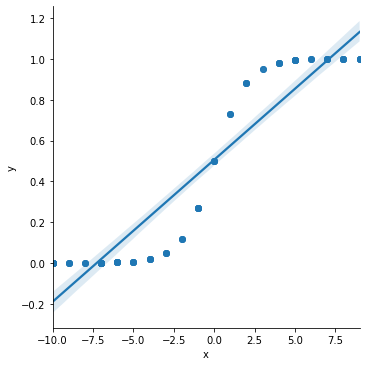

In [23]:
sns.lmplot(x='x',y='y',data=curve)

Note that in the above plot, there are estimated "probabilities" (the $\hat{y}$ values) that are either lower than $0$ or higher than $1$.  This is statistically impossible.

That fancy S-shaped function above is called the *inverse logit* function.  That is because $e^x / (1+e^x)$ is the inverse of the *logit* function given by $log(x / (1-x)$.  Just like we can invert the equation $y = f(x)$ to get $f^{-1}(y) = x$, the inverse of $y = e^x / (1+e^x)$ is given by $log(y / (1-y)) = x$.

When we model probabilities, the $y$ variable will be either $0$ or $1$ for any observations.  Observations where the event occurred are recorded with $y=1$.  For instance, in a dataset about mortgage default, those borrowers who default on their mortgage would have $y=1$ and everyone else would have $y=0$.

Suppose that we estimate a model given by

$$
log\Big(\frac{y}{1-y}\Big) = \alpha + \beta x + u.
$$

Then, the estimated value $\hat{\alpha} + \hat{\beta}x$ for a given observation would be $log(\hat{y}/(1-\hat{y}))$.  This is what we refer to as the *log odds ratio*.  The odds ratio is the probability that $y$ equals $1$ divided by the probability that $y$ equals $0$; this is what $\hat{y}/(1-\hat{y})$ tells us.  Ultimately, our estimate for $\hat{y}$ then tells us the likelihood that the true value for $y$ is equal to $1$.

This type of model is called a logistic regression model.  Let's simulate some data.

In [24]:
np.random.seed(0)
df3 = pd.DataFrame(columns=['x','y'])
df3['x'] = np.random.normal(2, 1, 1000)
df3['a+bx'] = -9 + 4*df3['x']
df3['y (almost)'] = np.exp(df3['a+bx']) / (1+np.exp(df3['a+bx'])) # y (almost) is y if there was no random noise (no +u)

In [25]:
df3['y'] = np.random.binomial(n=1, p=df3['y (almost)']) # this adds u to the model

In [26]:
df3.head()

,x,y,a+bx,y (almost)
0,3.764052,1,6.056209,0.997662
1,2.400157,0,0.600629,0.645800
2,2.978738,1,2.914952,0.948581
3,4.240893,1,7.963573,0.999652
4,3.867558,1,6.470232,0.998454


In [27]:
df3['cons'] = 1
lpm = sm.OLS(df3['y'], df3[['cons','x']]).fit()
print(lpm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1056.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          1.41e-158
Time:                        11:03:09   Log-Likelihood:                -346.17
No. Observations:                1000   AIC:                             696.3
Df Residuals:                     998   BIC:                             706.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons          -0.2928      0.024    -12.187      0.0

In [28]:
logit = sm.Logit(df3['y'], df3[['cons','x']]).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.292801
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.5660
Time:                        11:03:09   Log-Likelihood:                -292.80
converged:                       True   LL-Null:                       -674.60
Covariance Type:            nonrobust   LLR p-value:                4.432e-168
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cons          -8.5975      0.567    -15.154      0.000      -9.709      -7.486
x              3.8987      0.

### Ceteris Paribus

In your microeconomics class, you probably encountered the phrase *ceteris paribus*.  This is Latin for "all else equal".  At the time, it may have seemed like economists were just trying to be fancy.  In actuality, the ceteris paribus assumption is key to all analytics.

Take the laws of supply and demand as an example.  The law of demand says that when the price of an item, for instance a cell phone is higher, there will be a lower quantity demanded of that item.  But this is implicitly a certeris paribus statement.  The Palm Centro launched in 2007 at a price of $\$100$, and sold a million units in six months.  In contrast, the original iPhone launched at around the same time, at a release price of $499.  Does the higher price mean that fewer iPhones were sold compared to Palm Centros?  No.  The iPhone sold over a million units in under a third the time it took Palm to do so.  The reason why is the *quality* of the product being offered.

Hence, consider the equation

$$
Q = c + \beta P + u
$$

where $Q$ is the quantity of phones demanded and $P$ is the price.  In economics, the ceteris paribus assumption means that we want to predict the quantity demanded of a good given the price of a good, holding *all else equal*.

When it comes to real world data, the ceteris paribus assumption is violated.  When we observe the price for an item and the amount demanded of it, there are other things at play that make the estimation of the relationship between price and quantity difficult.

Another way to think of this is to say that the error-term, $u$, in the equation is not a purely random phenomenon.  Rather, we might have something like

$$
Q = c + \beta P + u
$$

$$
Q = c + \beta P + (\gamma F + v)
$$

$$
\text{for }u := \gamma F + v
$$

where $F$ is some other feature (e.g. quality) of the phone we should that consider because it has an effect on how many people demand the phone.  The symbol $:=$ implies a definitional equality (e.g. read "y := x+1" as "y is defined to equal x plus 1").

In this case, we say that the equation $Q = c + \beta P + u$ has **omitted variable bias** because there is some omitted variable $F$ that we do not include in the regression.  Strictly speaking, if there is any correlation between $P$ and $F$, the estimated coefficient for $\beta$ in a regression specification that omits $F$ will be biased.  This means that the estimated value for $\beta$ is guaranteed to be inaccurate, no matter how much data you may have.

When we move on to case studies, this concept will be very important.

### Application: Equity $\beta$

When we use something like the `ols()` function above to calculate the slope of a straight line, the equation being modeled looks like:

$$
y = c + \beta x + u.
$$

Recall that the CAPM equation states:

$$
R_{i,t} = R_{f,t} + \beta_i (R_{m,t} - R_{f,t})
$$

which we can re-arrange to form:

$$
R_{i,t} - R_{f,t} = \beta_i (R_{m,t} - R_{f,t}).
$$

Note the similarities between this equation and the equation for a straight line.  We can use linear regression to fit the re-arranged CAPM equation by writing $y=R_{i,t}-R_{f,t}$, $c=0$, and $x=R_{m,t}-R_{f,t}$.  The CAPM formula tells us that the *excess* return on the stock, $y$, is equal to the stock's $beta$ times the market risk premium, $x$, on average.  There are random deviations from this average relationship between $x$ and $y$, and we model this with the error term $u$.

The CAPM equation is based on a theoretical relationship between a stock's excess return and the market risk premium.  Per the equation derived by the theory, there is no intercept (equivalently: the intercept is zero).  This is why `statsmodels` does not automatically assume for you that there should be an intercept.  Some theoretical relationships between a `y` variable and `x` variable(s) imply that the intercept should be zero.

Below, we will simulate stock return data according to CAPM.  Thus, no intercept will be included.  After, we will run a regression with an intercept variable added, and see that including an intercept in this case is actually quite harmless.

Assume that the market return has an average annual return of $8\%$ and annual volatility of $10\%$, the risk free rate is constant at $0.03$, and let $\beta=1.2$.  Simulate one year of returns.

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

np.random.seed(0)

annual_mean = 0.08
annual_vol = 0.1
annual_rf = 0.03

mean = (1+annual_mean)**(1/252) - 1
vol = annual_vol / np.sqrt(252)
rf = (1+annual_rf)**(1/252) - 1

mkt_ret = np.random.normal(mean, vol, 252)
mrp = mkt_ret - rf

beta = 1.2
stk_ret = rf + beta*mrp + np.random.normal(0, 0.01, 252)
excess_ret = stk_ret - rf

/mnt/software/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

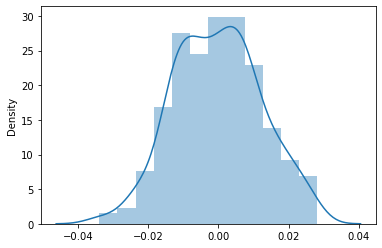

In [30]:
sns.distplot(stk_ret)

<AxesSubplot:>

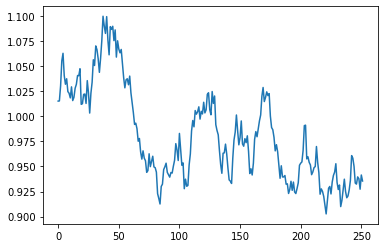

In [31]:
price = np.cumprod(1+stk_ret)
sns.lineplot(x=range(252), y=price)

Now, estimate a linear model.  Do not add an intercept term.

In [32]:
capm = sm.OLS(excess_ret, mrp).fit()
print(capm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.347
Model:                            OLS   Adj. R-squared (uncentered):              0.344
Method:                 Least Squares   F-statistic:                              133.3
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    5.14e-25
Time:                        11:03:09   Log-Likelihood:                          803.52
No. Observations:                 252   AIC:                                     -1605.
Df Residuals:                     251   BIC:                                     -1602.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Now repeat the estimation, but include an intercept term.

In [33]:
cons = [1 for i in range(252)]

capm_int = sm.OLS(excess_ret, np.column_stack( (cons, mrp) ) ).fit()
print(capm_int.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     134.7
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           3.34e-25
Time:                        11:03:09   Log-Likelihood:                 804.25
No. Observations:                 252   AIC:                            -1604.
Df Residuals:                     250   BIC:                            -1597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -1.198      0.2

Note that, because the true intercept is actually zero, Python ends up estimating an intercept that is in fact very close to zero.

Hence, we should always include an intercept when running a regression model.  If an intercept is irrelevant (i.e. close to zero), then let Python estimate it.  Do not exclude an intercept under the assumption that it should be irrelevant, because you may be wrong.